In [8]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import leastsq, minimize,differential_evolution
import matplotlib.pyplot as plt 
import os
%matplotlib inline 
os.getcwd()

'/home/akilin/Documents/NCCU/111下/利率工程'

### Data Prepocessing

In [20]:
#df_2023 = pd.read_csv('./daily_treasury_par_yield_curve_rates/daily-treasury-rates-2023.csv', parse_dates=['Date'])
#df_2022 = pd.read_csv('./daily_treasury_par_yield_curve_rates/daily-treasury-rates-2022.csv', parse_dates=['Date'])
#df_2021 = pd.read_csv('./daily_treasury_par_yield_curve_rates/daily-treasury-rates-2021.csv', parse_dates=['Date'])
#df_2020 = pd.read_csv('./daily_treasury_par_yield_curve_rates/daily-treasury-rates-2020.csv', parse_dates=['Date'])
#df_2019 = pd.read_csv('./daily_treasury_par_yield_curve_rates/daily-treasury-rates-2019.csv', parse_dates=['Date'])
#df_2018 = pd.read_csv('./daily_treasury_par_yield_curve_rates/daily-treasury-rates-2018.csv', parse_dates=['Date'])
#df_2018.columns

In [21]:
#df = pd.DataFrame()
#table_list = [df_2023, df_2022, df_2021, df_2020, df_2019, df_2018]
#table_list_1 = [ df_2021, df_2020, df_2019]
#def dataMerge(df:object,table_list:list) -> None :
    
    # data merge
    #for i in table_list:
        #df = pd.concat([df,i], axis=0)
    #return df

In [22]:
#table_list[0]

In [23]:
#df_1 = dataMerge(df = df, table_list=table_list_1)
#df_1.to_csv('test.csv')
#df_1

In [24]:
#df = dataMerge(df=df,table_list=table_list)
#df.to_csv('basic.csv')
#df

In [9]:
df = pd.read_csv('Final/daily_treasury_rates.csv',parse_dates=['Date'],index_col=['Date'])
df = df/100
df

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-06-06,0.0515,0.0526,0.0544,0.0544,0.0544,0.0520,0.0451,0.0415,0.0385,0.0378,0.0370,0.0402,0.0387
2023-06-05,0.0525,0.0535,0.0546,0.0547,0.0546,0.0517,0.0446,0.0410,0.0382,0.0377,0.0369,0.0403,0.0389
2023-06-02,0.0528,0.0539,0.0550,0.0552,0.0550,0.0522,0.0450,0.0413,0.0384,0.0378,0.0369,0.0403,0.0388
2023-06-01,0.0530,0.0539,0.0550,0.0550,0.0544,0.0511,0.0433,0.0398,0.0370,0.0366,0.0361,0.0398,0.0384
2023-05-31,0.0528,0.0537,0.0552,0.0553,0.0546,0.0518,0.0440,0.0404,0.0374,0.0369,0.0364,0.0401,0.0385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09,0.0437,0.0458,0.0470,0.0474,0.0483,0.0469,0.0419,0.0393,0.0366,0.0360,0.0353,0.0383,0.0366
2023-01-06,0.0432,0.0455,0.0467,0.0474,0.0479,0.0471,0.0424,0.0396,0.0369,0.0363,0.0355,0.0384,0.0367
2023-01-05,0.0430,0.0455,0.0466,0.0475,0.0481,0.0478,0.0445,0.0418,0.0390,0.0382,0.0371,0.0396,0.0378


### Maturity tranform

In [26]:
def convert_maturity(maturity_str):
    if 'M' in maturity_str:
        return int(maturity_str.split()[0]) / 12
    elif 'Y' in maturity_str:
        return int(maturity_str.split()[0])
    else:
        return 0

df_T = pd.DataFrame({'Maturity': df.columns})
df_T['Maturity_num'] = df_T['Maturity'].apply(convert_maturity)
df_T

,Maturity,Maturity_num
0,1 Mo,0.083333
1,2 Mo,0.166667
2,3 Mo,0.250000
3,4 Mo,0.333333
4,6 Mo,0.500000
5,1 Yr,1.000000
6,2 Yr,2.000000
7,3 Yr,3.000000
8,5 Yr,5.000000
9,7 Yr,7.000000


### Zero Coupon Bound Transform

In [27]:
maturity = np.array(df_T['Maturity_num'])
zero_rate = np.array(df)
#transform to ZCB
bond = pd.DataFrame(np.exp(-zero_rate * maturity.reshape(1, -1)), columns=df.columns, index=df.index)
bond.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-06-06,0.995718,0.991272,0.986492,0.982030,0.973167,0.949329,0.913748,0.882938,0.824894,0.767513,0.690734,0.447535,0.313173
2023-06-05,0.995635,0.991123,0.986443,0.981932,0.973069,0.949614,0.914663,0.884264,0.826133,0.768050,0.691425,0.446641,0.311299
2023-06-02,0.995610,0.991057,0.986344,0.981768,0.972875,0.949139,0.913931,0.883468,0.825307,0.767513,0.691425,0.446641,0.312235
2023-06-01,0.995593,0.991057,0.986344,0.981834,0.973167,0.950184,0.917044,0.887453,0.831104,0.773987,0.696979,0.451130,0.316004
2023-05-31,0.995610,0.991090,0.986295,0.981736,0.973069,0.949519,0.915761,0.885857,0.829444,0.772363,0.694891,0.448431,0.315058


In [28]:
#輸入參數（為了跑圖）

#目標日期
target_date = '2023-06-05'

#第幾筆資料
i = df.index.get_loc(target_date)

#時間間隔
dt = 1/365

#speed of mean reversion
kappa = 0.5
#0.255(校正結果)

#instantaneous volatility
sigma = 0.3
#0.343(校正結果)

# use ?M as short rate
short_rate = np.array(df['3 Mo'])

#模擬路徑(條)
path = 10

In [29]:
# # Zero Coupon Bond Price
# plt.figure(figsize=(8,4))
# T = np.arange(maturity[0],maturity[-1],dt)

# plt.plot(maturity ,bond.iloc[i],'o-')
# plt.grid()
# plt.xlabel('time to Maturity(Year)')
# plt.ylabel('Discount Factor')
# plt.title('Zero Coupon Bond Price (%s)'% df.index[i])
# plt.show()

### Calibration of $\theta(t)$

In [30]:
# 定義 spot rate
def R(coef, t):
    """
    Cubic polynomial method
    R(0,t) = b0 + b1 * t + b2 * t^2 + b3 * t^3
    """
    b0, b1, b2 ,b3 = coef
    return b0 + b1 * t + b2 * (t**2) + b3 * (t**3)

def residual(coef, r, t):
    return r - R(coef, t)

# 定義 instantaneous forward rate
def f(coef,t):
    """f(0,t) = b0 + 2*b1 * t + 3*b2 * t^2 + 4*b3 * t^3"""
    b0, b1, b2, b3 = coef
    return b0 + 2*b1 * t + 3*b2 * (t**2) + 4*b3 * (t**3)

# 定義 Long-term average level
def theta(coef,t,kappa,sigma):
    b0, b1, b2, b3 = coef
    return (b0 + 2*b1/kappa) + 2*(b1 + 3*b2/kappa) * t + 3*(b2 + 4*b3/kappa) * (t**2) + 4*b3 * (t**3) + (sigma**2/(2*(kappa**2)))*(1 - np.exp(-2*kappa*t))


# least square method
N = len(df.index)#資料筆數

#initial value
x0 = np.array([1,1,1,1],dtype=float)
coef_cubic = np.zeros((N,4))

for i in range(N):
    coef_cubic[i] = leastsq(residual, x0, args=(zero_rate[i], maturity))[0]

In [31]:
coef_cubic[i].shape

(4,)

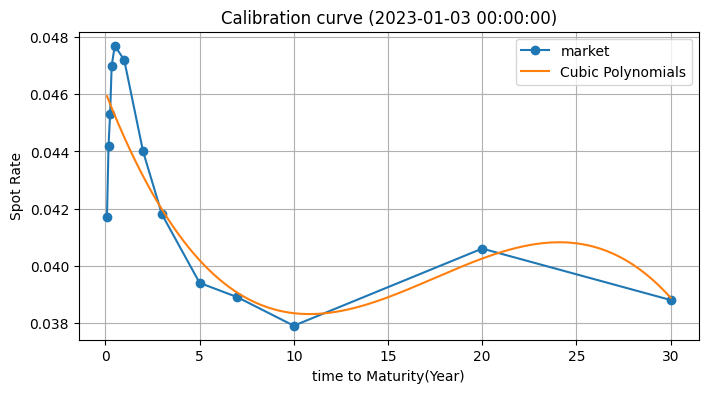

In [32]:
# Calibration
plt.figure(figsize=(8,4))
T = np.arange(maturity[0],maturity[-1],dt)

plt.plot(maturity ,zero_rate[i],'o-',label='market')
plt.plot(T,R(coef_cubic[i], T),label='Cubic Polynomials')
plt.legend()
plt.grid()
plt.xlabel('time to Maturity(Year)')
plt.ylabel('Spot Rate')
plt.title('Calibration curve (%s)'% df.index[-1])
plt.show()

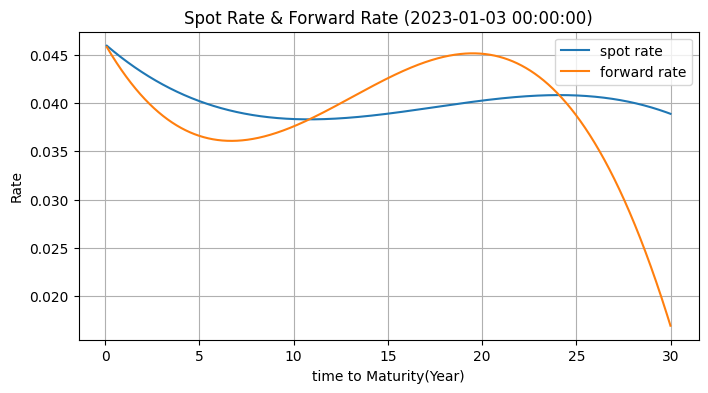

In [33]:
# Forward Rate
plt.figure(figsize=(8,4))
T = np.arange(maturity[0],maturity[-1],dt)

plt.plot(T,R(coef_cubic[i], T),label='spot rate')
plt.plot(T,f(coef_cubic[i], T),label='forward rate')
plt.legend()
plt.grid()
plt.xlabel('time to Maturity(Year)')
plt.ylabel('Rate')
plt.title('Spot Rate & Forward Rate (%s)'% df.index[i])
plt.show()

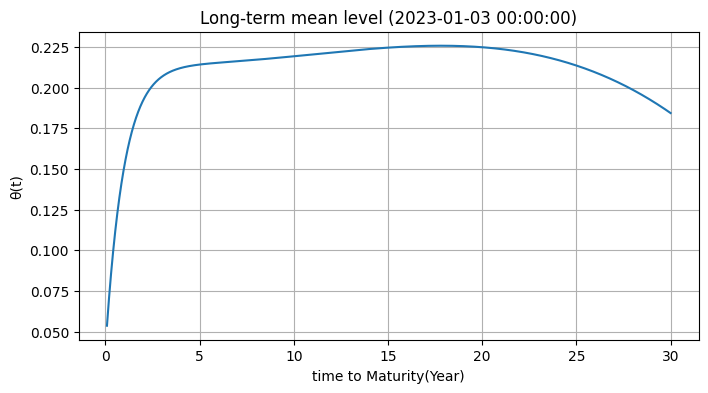

In [34]:
# Long-term mean level 
T = np.arange(maturity[0],maturity[-1],dt)

plt.figure(figsize=(8,4))
plt.plot(T,theta(coef_cubic[i],T,kappa,sigma),label='θ(t)')
# plt.legend()
plt.grid()
plt.xlabel('time to Maturity(Year)')
plt.ylabel('θ(t)')
plt.title('Long-term mean level (%s)'% df.index[i])
plt.show()

### test 123

In [11]:
# Define log-normal BK model equation
def bk_lognormal(r, t, kappa, sigma, theta):
    dt = t
    drift = kappa * (theta - np.log(r)) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal()
    return r * np.exp(drift + diffusion)

# Define log-likelihood function for log-normal BK model
def log_likelihood_lognormal(params, data):
    kappa, sigma, theta = params
    r0 = data.iloc[0]['3 Mo']
    T = len(data)
    r = np.zeros(T)
    r[0] = r0
    for i in range(1, T):
        t = i
        r[i] = bk_lognormal(r[i-1], t, kappa, sigma, theta)
    p = np.exp(-data.index * r) / np.exp(-data.index * r[-1])
    error = np.log(data['3 Mo']) - np.log(p * 100)
    return -np.sum(np.log(1 / (data['3 Mo'] * np.sqrt(2 * np.pi))) - 0.5 * (error / data['3 Mo'])**2)

In [17]:
params = x0
data = df.reset_index()[['Date','3 Mo']][70:100]
kappa, sigma, theta = params
r0 = data.iloc[0]['3 Mo']
T = len(data)
r = np.zeros(T)
r[0] = r0
for i in range(1, T):
    t = i
    r[i] = bk_lognormal(r[i-1], t, kappa, sigma, theta)
p = np.exp(-data.index * r) / np.exp(-data.index * r[-1])
error = np.log(data['3 Mo']) - np.log(p * 100)

In [12]:
df['3 Mo'][:].values

array([0.0544, 0.0546, 0.055 , 0.055 , 0.0552, 0.0555, 0.0534, 0.0538,
       0.0537, 0.0534, 0.054 , 0.0529, 0.0531, 0.0526, 0.0523, 0.0521,
       0.0525, 0.052 , 0.0524, 0.0529, 0.0531, 0.0526, 0.0526, 0.0526,
       0.0524, 0.0527, 0.051 , 0.0518, 0.0516, 0.0512, 0.052 , 0.0514,
       0.0512, 0.0516, 0.052 , 0.0521, 0.0514, 0.051 , 0.0502, 0.0504,
       0.0508, 0.0495, 0.0491, 0.0486, 0.0488, 0.049 , 0.0485, 0.0497,
       0.048 , 0.048 , 0.0491, 0.0474, 0.0473, 0.0479, 0.0478, 0.0481,
       0.0452, 0.0474, 0.0475, 0.0488, 0.0487, 0.0501, 0.0505, 0.0506,
       0.0504, 0.0493, 0.0491, 0.0491, 0.049 , 0.0488, 0.0489, 0.0486,
       0.0484, 0.0484, 0.0486, 0.0484, 0.0484, 0.0479, 0.048 , 0.0481,
       0.0479, 0.0477, 0.0472, 0.0471, 0.0471, 0.047 , 0.0466, 0.0466,
       0.047 , 0.0472, 0.0473, 0.0471, 0.0472, 0.0472, 0.0473, 0.0472,
       0.0471, 0.0469, 0.0471, 0.0467, 0.0466, 0.0472, 0.0473, 0.047 ,
       0.0467, 0.0466, 0.0455, 0.0453])

In [5]:
# df.reset_index()[['Date','3 Mo']]

,Date,3 Mo
0,2023-06-06,0.0544
1,2023-06-05,0.0546
2,2023-06-02,0.0550
3,2023-06-01,0.0550
4,2023-05-31,0.0552
...,...,...
103,2023-01-09,0.0470
104,2023-01-06,0.0467
105,2023-01-05,0.0466
106,2023-01-04,0.0455


In [16]:
# Define initial parameter values and bounds
x0 = [0.1, 0.01, 0.05]
#bounds = [(0, None), (0, None), (None, None)]

# Sort the data by 'Date'
#df.sort_values('Date', inplace=True)

# Reset the index
#df.reset_index(drop=True, inplace=True)

# Estimate parameters using MLE
result = minimize(log_likelihood_lognormal, x0, args=(df.reset_index()[['Date','3 Mo']][70:100]))
kappa, sigma, theta = result.x

print('Estimated parameters:')
print('kappa =', kappa)
print('sigma =', sigma)
print('theta =', theta)

/home/akilin/anaconda3/envs/gamma/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


Estimated parameters:
kappa = 0.1
sigma = 0.01
theta = 0.05


### Plot 3Mo rate data

In [ ]:
theta() 

<function __main__.theta(coef, t, kappa, sigma)>

In [ ]:
def black_karasinski(r0:float, n: int, dt:float, theta:np.array, sigma:np.array, kappa:float):
    """""
    Simulate the Black-Karasinski short-rate model
    
    Args:
        r0(float): initial short-rate value
        n(int): number of time step
        dt(float): time step size
        theta(ndarray): array of mean-reversion levels for each time step
        sigma(ndarray): array of volatility values for each time step
        kappa(float): array of mean-reversion speed values
        
    Return:
        ndarray: array of simulated short-rate values 
    """""
    r = np.zeros(n)
    r[0] = r0
    for i in range(1,n):
        ri_1Ln = np.log(r[i-1])
        driLn = theta[i-1] - kappa[i-1]*ri_1Ln
        riLn = ri_1Ln + driLn*dt +sigma[i-1]*np.sqrt(dt)*np.random.normal()
        r[i] = np.exp(riLn)
    return r
T = np.arange(maturity[0],maturity[-1],dt)
r0 = df['3 Mo'][0]
n = len(df.index)
dt = 1/365
kappa = np.ones(n)*0.1
sigma = np.ones(n)*0.01
theta = np.linspace(0.05, 0.25, n)
rate = black_karasinski(r0, n, dt, theta, sigma, kappa)
rate


array([0.0144    , 0.0144403 , 0.01445505, ..., 0.0883024 , 0.08849938,
       0.08872307])

Text(0.5, 1.0, '3Mo rate')

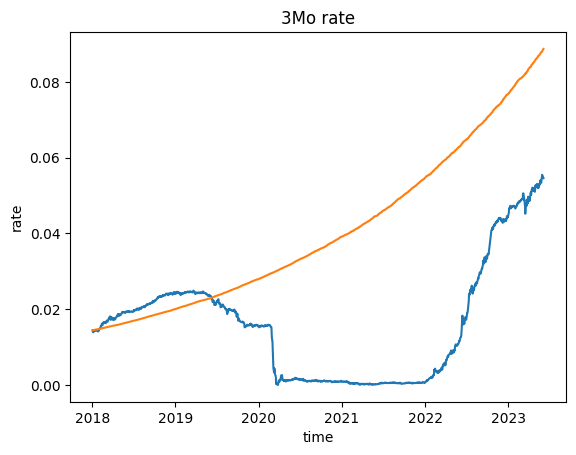

In [ ]:
plt.plot(df['3 Mo'])
plt.plot(df.index,rate)
plt.xlabel('time')
plt.ylabel('rate')
plt.title('3Mo rate')

In [ ]:
from scipy.optimize import minimize

# Given interest rate data
data = [
    [5.25, 5.35, 5.46, 5.47, 5.46, 5.17, 4.46, 4.10, 3.82, 3.77, 3.69, 4.03, 3.89],
    [5.28, 5.39, 5.50, 5.52, 5.50, 5.22, 4.50, 4.13, 3.84, 3.78, 3.69, 4.03, 3.88],
    # Add the rest of your data here
]

# Convert rates to continuously compounded rates
compounded_rates = np.log(np.array(data) / 100)

# Set initial spot rate (r0)
r0 = compounded_rates[0][0]

# Define the objective function to minimize
def objective(params):
    a, sigma = params
    squared_diff_sum = 0
    
    for i in range(1, len(compounded_rates)):
        T = i / 12  # Assuming monthly data, divide by 12 to get years
        theta = compounded_rates[i-1]  # theta at time t is (t-1) real rate
        model_rate = r0 * np.exp(theta * T - a * (1 - np.exp(-a * T)) / a + sigma**2 * (1 - np.exp(-2 * a * T)) / (4 * a))
        squared_diff_sum += (model_rate - compounded_rates[i])**2
    
    return squared_diff_sum

# Initial guess for parameters
initial_params = [0, 0]

# Minimize the objective function to calibrate parameters
result = minimize(objective, initial_params, method='Nelder-Mead')

# Extract the calibrated parameters
calibrated_params = result.x
a, sigma = calibrated_params

print("Calibrated Parameters:")
print("a:", a)
print("Sigma:", sigma)


###  Black-Karasinski Model 

In [ ]:
def black_karasinski_trinomial_tree(r0, kappa, theta, sigma, T, num_steps, num_paths):
    dt = T / num_steps
    sqrtdt = np.sqrt(dt)
    
    interest_rates = np.zeros((num_steps, num_paths))
    interest_rates[0] = r0
    
    for i in range(num_steps):
        dW = np.random.normal(size=(3, num_paths))
        
        vol_up = sigma[i] * np.exp(theta * interest_rates[i]) * sqrtdt
        vol_down = -sigma[i] * np.exp(theta * interest_rates[i]) * sqrtdt
        vol_unchanged = np.zeros_like(vol_up)
        
        dR = np.zeros_like(dW)
        dR[0] = vol_down * dW[0]
        dR[1] = vol_unchanged * dW[1]
        dR[2] = vol_up * dW[2]
        
        interest_rates[i+1] = interest_rates[i] + kappa * (theta - interest_rates[i]) * dt + np.sum(dR, axis=0)
    
    return interest_rates

In [ ]:
# Example usage
r0 = df['3 Mo'][0]
kappa = 0.1
theta = 0.05
sigma = [0.02, 0.03, 0.04]  # Volatility at each time step
T = 1
num_steps = len(df)
num_paths = 1000

simulated_rates = black_karasinski_trinomial_tree(r0, kappa, theta, sigma, T, num_steps, num_paths)

# Print the simulated interest rate paths
for i in range(num_paths):
    print(simulated_rates[:, i])

IndexError: index 3 is out of bounds for axis 0 with size 3

Estimated parameters:
kappa = 0.1
sigma = 0.01
theta = 0.05


C:\Users\johnn\AppData\Local\Temp\ipykernel_18292\395066298.py:4: RuntimeWarning: divide by zero encountered in log
  drift = kappa * (theta - np.log(r)) * dt
C:\Users\johnn\AppData\Local\Temp\ipykernel_18292\395066298.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return r * np.exp(drift + diffusion)
c:\Users\johnn\anaconda3\envs\tf_2.3_py_3.7\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\johnn\AppData\Local\Temp\ipykernel_18292\395066298.py:4: RuntimeWarning: divide by zero encountered in log
  drift = kappa * (theta - np.log(r)) * dt
C:\Users\johnn\AppData\Local\Temp\ipykernel_18292\395066298.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return r * np.exp(drift + diffusion)
c:\Users\johnn\anaconda3\envs\tf_2.3_py_3.7\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

In [ ]:
predicted_values

array([1.44000000e+00, 5.93682343e-38,            inf, ...,
                  nan,            nan,            nan])

In [ ]:
df.iloc[0]

Date            2018-01-02 00:00:00
3 Mo                           1.44
3_Mo_percent                 0.0144
Name: 0, dtype: object

In [ ]:
import numpy as np

def black_karasinski_simulation(r0, T, N, a, sigma, theta):
    dt = T / N
    sqrt_dt = np.sqrt(dt)
    
    r = np.zeros(N+1)
    r[0] = r0
    
    for i in range(N):
        dW = np.random.normal(0, sqrt_dt)
        drift = theta[i] - a * r[i]
        diffusion = sigma * dW
        r[i+1] = r[i] + drift * dt + diffusion
    
    return r

# Parameters
r0 = df['3 Mo'][0]  # Initial short rate
T = 1.0  # Time to maturity
N = len(df.index)  # Number of time steps
a = 0.1  # Speed of mean reversion
sigma = 0.02  # Volatility
theta = np.linspace(0.05, 0.1, N)  # Mean reversion level

# Simulation
simulation = black_karasinski_simulation(r0, T, N, a, sigma, theta)

# Print the simulated short rate values
print(simulation[:-1].shape,df.index)


(1357,) DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-30', '2023-05-31', '2023-06-01',
               '2023-06-02', '2023-06-05'],
              dtype='datetime64[ns]', name='Date', length=1357, freq=None)


Text(0.5, 1.0, '3Mo rate')

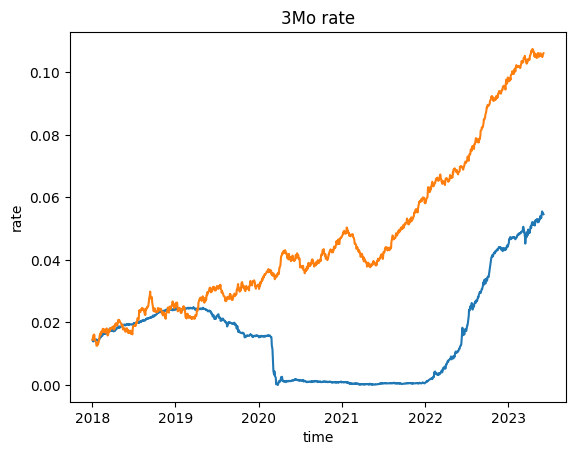

In [ ]:
plt.plot(df.index,df['3 Mo'])
plt.plot(df.index,simulation[:-1])
plt.xlabel('time')
plt.ylabel('rate')
plt.title('3Mo rate')

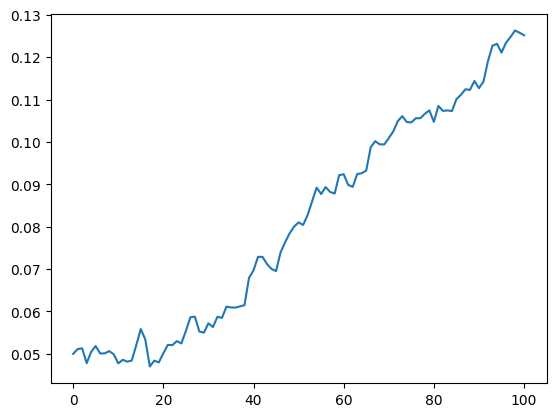

In [ ]:
plt.plot(simulation)

In [ ]:
import numpy as np

def trinomial_tree(r0, alpha, theta, sigma, a, T, N):
    dt = T / N

    # Create the tree array
    tree = np.zeros((N+1, 2*N+1))
    tree[0, N] = r0

    # Create the probability array
    P = np.zeros((N+1, 2*N+1))
    P[0, N] = 1.0

    # Calculate the drift term
    theta_i = np.zeros(N+1)
    for i in range(N+1):
        theta_i[i] = theta + (alpha - theta) * np.exp(-a * i * dt)

    # Build the tree
    for i in range(1, N+1):
        for j in range(N-i+1, N+i):
            tree[i, j] = tree[i-1, j-1] + theta_i[i-1] * dt

    # Calculate the discount factors
    discount_factors = np.exp(-np.sum(tree, axis=0) * dt)

    return tree, discount_factors


In [ ]:
# Test the code
np.random.seed(42)
r0 = 0.05
alpha = 0.1
theta = 0.05
sigma = 0.2
a = 0.1
T = 1.0
N = 100

r_tree, discount_factors = trinomial_tree(r0, alpha, theta, sigma, a, T, N)


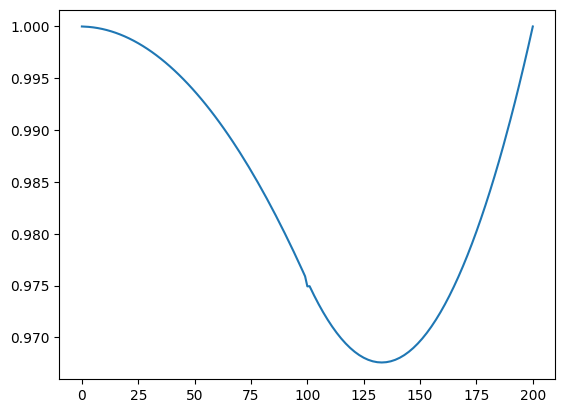

In [ ]:
plt.plot(discount_factors)

ValueError: x and y must have same first dimension, but have shapes (1,) and (201,)

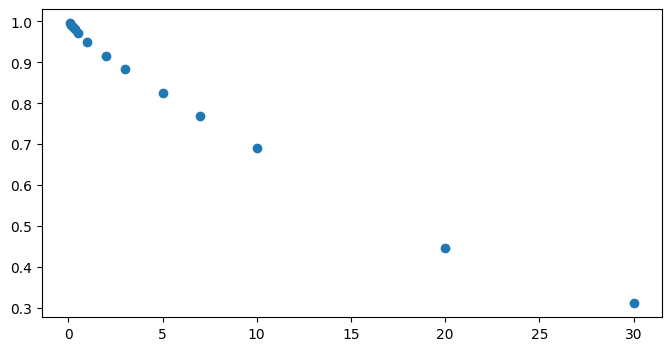

In [ ]:
discount_factors
plt.figure(figsize=(8,4))
plt.plot(maturity ,bond.iloc[i],'o',label='market')
plt.plot(T ,discount_factors,label='BK')
plt.legend()
plt.grid()
plt.xlabel('time to Maturity(Year)')
plt.ylabel('Discount Factor')
plt.title('Zero Coupon Bond Price (%s)'% df.index[i])
plt.show()

In [ ]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        if np.abs(fx) < tol:
            break
        dfx = df(x)
        x = x - fx / dfx
    return x

# Test the code
np.random.seed(42)
r0 = 0.05
alpha = 0.1
theta = [0.05, 0.1, 0.15]
sigma = 0.2
a = 0.1
T = 1.0
N = 100

r_tree, discount_factors = trinomial_tree(r0, alpha, theta, sigma, a, T, N)

# Print the results
print("Short Rate Tree:")
print(r_tree)
print()
print("Discount Factors:")
print(discount_factors)


In [ ]:
def black_karasinski(r0, n, dt, theta, sigma, kappa):
    """""
    Simulate the Black-Karasinski short-rate model
    
    Args:
        r0(float): initial short-rate value
        n(int): number of time step
        dt(float): time step size
        theta(ndarray): array of mean-reversion levels for each time step
        sigma(ndarray): array of volatility values for each time step
        kappa(float): array of mean-reversion speed values
        
    Return:
        ndarray: array of simulated short-rate values 
    """""
    r = np.zeros(n)
    r[0] = r0
    for i in range(1,n):
        ri_1Ln = np.log(r[i-1])
        driLn = theta[i-1] - alpha[i-1]*ri_1Ln
        riLn = ri_1Ln + driLn*dt +sigma[i-1]*np.sqrt(dt)*np.random.normal()
        r[i] = np.exp(riLn)
    return r

r0 = 